## Problem:
- csv extracted off the "csv_n_dataset_per_image" is not consistent from machine to machine

## Target:
- extract csv

## Method:
- having an anchor point (location at local 0,0) for every image, then calculate every points relative to the anchor

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
root = '/home/jthe/Dev/project/roofcounting/'
image_name = "Image_1b"
image_ext = ".csv"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
# image = cv2.imread(image_path)
# print(image_path)
csv_raw = pd.read_csv(image_path)

In [3]:
print(csv_raw.dtypes)
csv_raw.head()

FID             int64
OBJECTID_1      int64
OBJECTID        int64
X_Point       float64
Y_Point       float64
X_Anchor      float64
Y_Anchor      float64
X"_Anchor     float64
Y"_Anchor     float64
X_XAnchor     float64
Y_YAnchor     float64
X_X"Anchor    float64
Y_Y"Anchor    float64
dtype: object


,FID,OBJECTID_1,OBJECTID,X_Point,Y_Point,X_Anchor,Y_Anchor,"X""_Anchor","Y""_Anchor",X_XAnchor,Y_YAnchor,"X_X""Anchor","Y_Y""Anchor"
0,0,1,4355,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789
1,1,2,4356,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789
2,2,3,4359,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399
3,3,4,4360,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399
4,4,5,4409,723582.9502,9.298456e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,25.8957,-724.5024,-486.009626,6.28641


In [4]:
csv_raw["x"] = csv_raw['X_Point'] - csv_raw['X_Anchor']
csv_raw["y_raw"] = csv_raw["Y_Point"] - csv_raw["Y_Anchor"]
csv_raw['x_dist'] = csv_raw['X"_Anchor'] - csv_raw['X_Anchor'] 
csv_raw['y_dist'] = csv_raw['Y_Anchor'] - csv_raw['Y"_Anchor'] 

In [5]:
csv_raw.head()

,FID,OBJECTID_1,OBJECTID,X_Point,Y_Point,X_Anchor,Y_Anchor,"X""_Anchor","Y""_Anchor",X_XAnchor,Y_YAnchor,"X_X""Anchor","Y_Y""Anchor",x,y_raw,x_dist,y_dist
0,0,1,4355,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789,470.3562,-733.2267,511.905326,730.78881
1,1,2,4356,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789,470.3562,-733.2267,511.905326,730.78881
2,2,3,4359,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399,72.1595,-731.3828,511.905326,730.78881
3,3,4,4360,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399,72.1595,-731.3828,511.905326,730.78881
4,4,5,4409,723582.9502,9.298456e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,25.8957,-724.5024,-486.009626,6.28641,25.8957,-724.5024,511.905326,730.78881


In [6]:
# check if all x and y corresponds to the points
image_name = "Image_1b_pts"
image_ext = ".png"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
image = cv2.imread(image_path)

In [7]:
print(image.shape)
print(csv_raw['x_dist'].max())
print(csv_raw['y_dist'].max())

x_img = image.shape[0]
y_img = image.shape[1]
x_csv = csv_raw['x_dist'].max()
y_csv = csv_raw['y_dist'].max()

x_mult = x_img/x_csv
y_mult = y_img/y_csv

(877, 620, 3)
511.90532600018196
730.7888099998236


In [8]:
print(x_mult)
print(y_mult)

1.7132074144500857
0.8483983218081154


In [9]:
# csv_raw["FID"].value_counts()
print(csv_raw[csv_raw['y_raw'] > 1]['FID'].nunique())
print(csv_raw['FID'].count())


14
2884


In [12]:
csv = csv_raw[csv_raw['y_raw'] < 1][['x','y_raw']]

In [13]:
csv['y'] = abs(csv['y_raw'])

In [14]:
csv.drop(['y_raw'], axis=1, inplace=True)

In [15]:
csv.reset_index(inplace=True)

In [16]:
csv['x'] = csv['x'] * x_mult
csv['y'] = csv['y'] * y_mult

In [17]:
csv.tail()

,index,x,y
2865,2865,512.500858,1.272428
2866,2866,275.698760,0.111734
2867,2867,275.698760,0.111734
2868,2870,670.008522,0.590061
2869,2871,670.008522,0.590061


In [13]:
print(csv.count())
# print(csv.loc[2867])
csv.tail()

index    2870
x        2870
y        2870
dtype: int64


,index,x,y
2865,2865,299.1470,1.4998
2866,2866,160.9255,0.1317
2867,2867,160.9255,0.1317
2868,2870,391.0843,0.6955
2869,2871,391.0843,0.6955


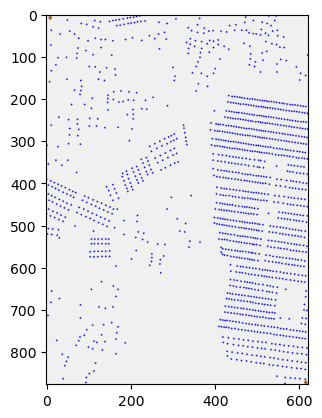

In [10]:
plt.imshow(image)

In [18]:
output = image.copy()

for i in range(len(csv)):
#     print("i: {}, X: {}, Y:{}".format(i, int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])))
    cv2.circle(output, (int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])), 1, (0, 255,0), 4)


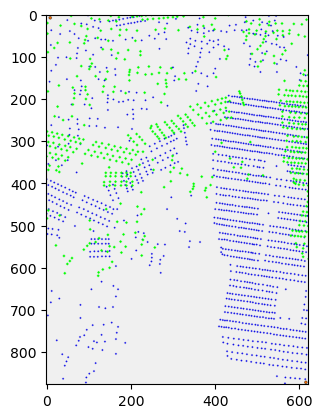

In [19]:
plt.imshow(output)

In [45]:
image.shape

(877, 620, 3)